In [165]:
import matplotlib.pyplot as plt
from matplotlib import style

In [166]:
style.use('ggplot') or plt.style.use('ggplot')

# Dados Crus

In [128]:
import pandas as pd

In [129]:
dados = pd.read_csv('tips.csv')
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [130]:
dados.shape

(244, 6)

## Renomeando colunas

In [131]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [132]:
# Para renomear tbm pode ser feito através de dicionário {'nome_antigo':'nome_novo'}
dados.columns = ['valor_conta','gorjeta','sobremesa','dia','hora','pessoas']
dados.head()

,valor_conta,gorjeta,sobremesa,dia,hora,pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Renomenado celulas

In [133]:
dados.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [134]:
sim_nao = {
           'No':'Não', 
           'Yes':'Sim'}

In [135]:
# .map( ) --> sobrescreve os dados da coluna
dados.sobremesa = dados.sobremesa.map(sim_nao)

In [136]:
dados.head()

,valor_conta,gorjeta,sobremesa,dia,hora,pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [137]:
dados.dia.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [138]:
dia_semana = {
            'Sun':'Domingo',
            'Sat': 'Sábado',
            'Thur': 'Quinta', 
            'Fri': 'Sexta'}

In [139]:
dados.dia = dados.dia.map(dia_semana)

In [140]:
dados.head()

,valor_conta,gorjeta,sobremesa,dia,hora,pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [141]:
dados.hora.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [142]:
hora = {
        'Dinner':'Jantar',
        'Lunch':'Almoço'}

In [143]:
dados.hora = dados.hora.map(hora)

## Dados traduzidos

In [144]:
dados

,valor_conta,gorjeta,sobremesa,dia,hora,pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3
240,27.18,2.00,Sim,Sábado,Jantar,2
241,22.67,2.00,Sim,Sábado,Jantar,2
242,17.82,1.75,Não,Sábado,Jantar,2


# Comparando distribuições de maneira exploratória

## Seaborn e Scatterplot

In [145]:
import seaborn as sns

In [146]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: c:\users\lucas\anaconda\lib\site-packages
Requires: scipy, matplotlib, numpy, pandas
Required-by: 


## Análise 1 - Valor da conta e gorjeta

In [147]:
dados.head()

,valor_conta,gorjeta,sobremesa,dia,hora,pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


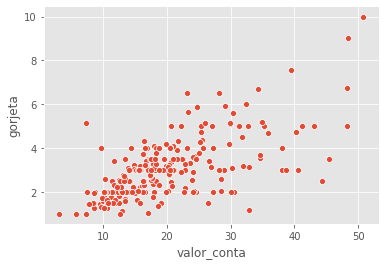

In [148]:
# Gráfico de Dispersão
gorjeta_conta = sns.scatterplot(x='valor_conta', y='gorjeta', data=dados)

### Adicionando Subtítulo

In [149]:
# Para colocar um subtítulo: figure.suptitle()
gorjeta_conta.figure.suptitle('Valor da conta x Gorjeta')

Text(0.5, 0.98, 'Valor da conta x Gorjeta')

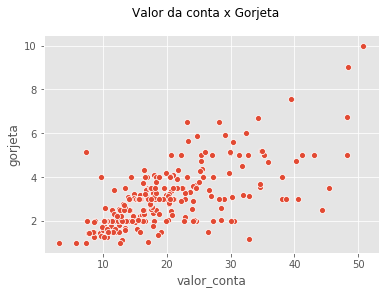

In [150]:
# Para acessar o gráfico é necessário usar o método: .get_figure()
gorjeta_conta.get_figure()

### Adicionando Título

In [151]:
# Para colocar um subtítulo: set_title()
gorjeta_conta.set_title('Análise do valor da gorjeta em função do valor da conta')

Text(0.5, 1, 'Análise do valor da gorjeta em função do valor da conta')

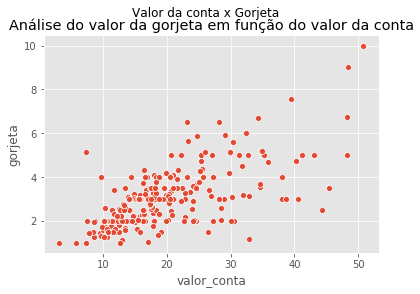

In [152]:
gorjeta_conta.get_figure()

### Alterando labels

In [153]:
# Usamos a função .set( )
gorjeta_conta.set(xlabel='Valor da conta', ylabel='valor da gorjeta')

[Text(20.200000000000003, 0.5, 'valor da gorjeta'),
 Text(0.5, 20.200000000000003, 'Valor da conta')]

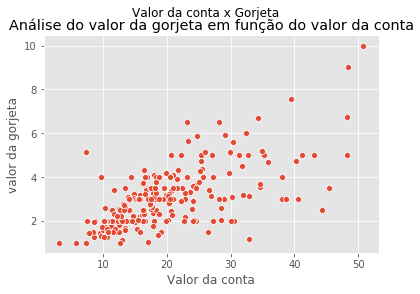

In [154]:
gorjeta_conta.get_figure()

* Insight: aumento do valor 'gorjeta' conforme o aumento do 'valor_conta'. É proporcional?

### Salvando uma imagem

In [155]:
# .savefig( )
imagem = gorjeta_conta.get_figure()
imagem.savefig('grafico1.png')

* Precisamos certificar que não existem dados nulos

In [156]:
# Não temos registros nulos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
valor_conta    244 non-null float64
gorjeta        244 non-null float64
sobremesa      244 non-null object
dia            244 non-null object
hora           244 non-null object
pessoas        244 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 8.6+ KB


In [157]:
# Outra forma de verificar a ausência de valores nulos
dados.count()

valor_conta    244
gorjeta        244
sobremesa      244
dia            244
hora           244
pessoas        244
dtype: int64

## Criando o campo porcentagem

In [158]:
dados.head()

,valor_conta,gorjeta,sobremesa,dia,hora,pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [159]:
dados['porcentagem'] = dados['gorjeta']/dados['valor_conta']

In [160]:
dados.head()

,valor_conta,gorjeta,sobremesa,dia,hora,pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [161]:
dados.porcentagem = dados.porcentagem.round(2)
dados.head()

,valor_conta,gorjeta,sobremesa,dia,hora,pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


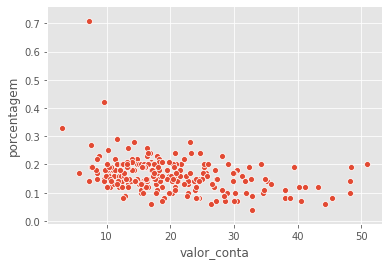

In [162]:
porcentagem_conta = sns.scatterplot(x='valor_conta', y='porcentagem', data=dados)

* Insight: visualmente, o 'valor_conta' não é proporcional ao da 'gorjeta'

## Relplot e lmplot

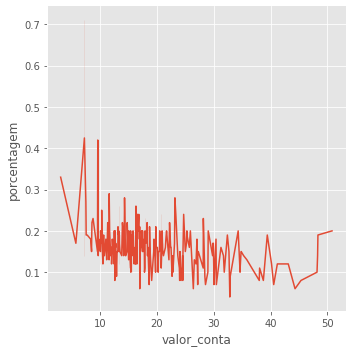

In [163]:
porcentagem_conta_linha = sns.relplot(x='valor_conta', y='porcentagem', kind='line', data=dados)

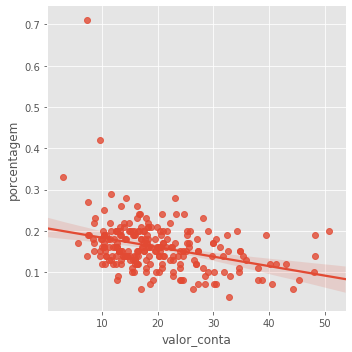

In [164]:
sns.lmplot(x='valor_conta', y='porcentagem', data=dados)

# Análises descritivas

## Análise 2 - Sobremesa

In [168]:
dados.head()

,valor_conta,gorjeta,sobremesa,dia,hora,pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [169]:
# Isolando entradas com 'sobremesa' == Sim
dados[dados.sobremesa=='Sim']

,valor_conta,gorjeta,sobremesa,dia,hora,pessoas,porcentagem
56,38.01,3.00,Sim,Sábado,Jantar,4,0.08
58,11.24,1.76,Sim,Sábado,Jantar,2,0.16
60,20.29,3.21,Sim,Sábado,Jantar,2,0.16
61,13.81,2.00,Sim,Sábado,Jantar,2,0.14
62,11.02,1.98,Sim,Sábado,Jantar,2,0.18
...,...,...,...,...,...,...,...
234,15.53,3.00,Sim,Sábado,Jantar,2,0.19
236,12.60,1.00,Sim,Sábado,Jantar,2,0.08
237,32.83,1.17,Sim,Sábado,Jantar,2,0.04
240,27.18,2.00,Sim,Sábado,Jantar,2,0.07


In [173]:
# query --> Forma alternativa de isolar entradas com 'sobremesa' == Sim
dados.query('sobremesa=="Sim"')

,valor_conta,gorjeta,sobremesa,dia,hora,pessoas,porcentagem
56,38.01,3.00,Sim,Sábado,Jantar,4,0.08
58,11.24,1.76,Sim,Sábado,Jantar,2,0.16
60,20.29,3.21,Sim,Sábado,Jantar,2,0.16
61,13.81,2.00,Sim,Sábado,Jantar,2,0.14
62,11.02,1.98,Sim,Sábado,Jantar,2,0.18
...,...,...,...,...,...,...,...
234,15.53,3.00,Sim,Sábado,Jantar,2,0.19
236,12.60,1.00,Sim,Sábado,Jantar,2,0.08
237,32.83,1.17,Sim,Sábado,Jantar,2,0.04
240,27.18,2.00,Sim,Sábado,Jantar,2,0.07


In [174]:
# descrevendo os dados gerais de quem pediu sobremesa
dados[dados.sobremesa=='Sim'].describe()

,valor_conta,gorjeta,pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [175]:
# descrevendo os dados gerais de quem não pediu sobremesa
dados[dados.sobremesa=='Não'].describe()

,valor_conta,gorjeta,pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


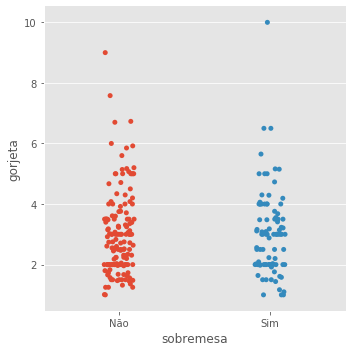

In [176]:
sns.catplot(x='sobremesa', y='gorjeta', data=dados)

hue : Grouping variable that will produce elements with different colors.
> Can be either categorical or numeric, although color mapping will behave differently in latter case.

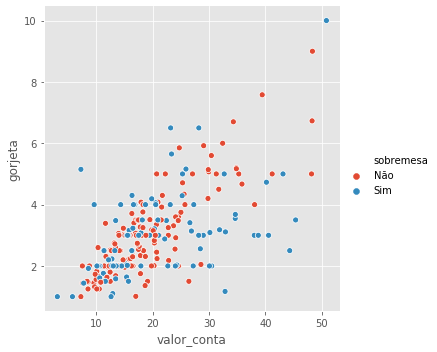

In [188]:
sns.relplot(x='valor_conta', y='gorjeta', hue='sobremesa', data=dados)

row, col : names of variables in ``data``, optional
> Categorical variables that will determine the faceting of the grid.

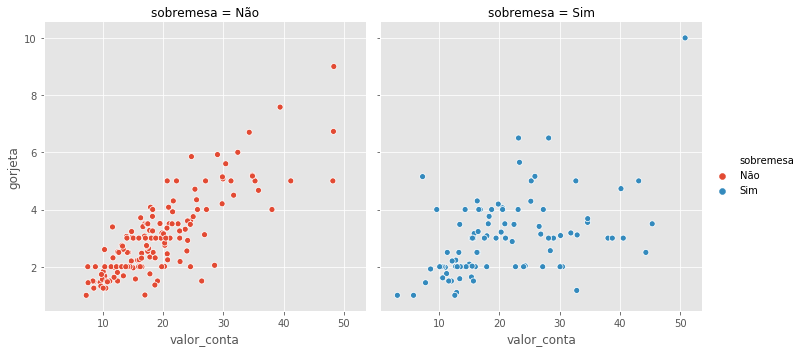

In [211]:
sns.relplot(x='valor_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=dados)

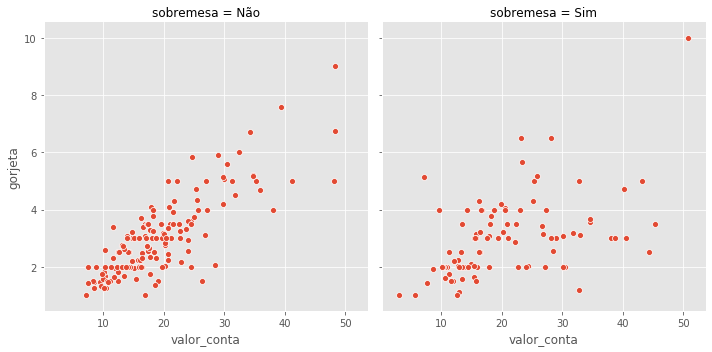

In [190]:
sns.relplot(x='valor_conta', y='gorjeta', col='sobremesa', data=dados)

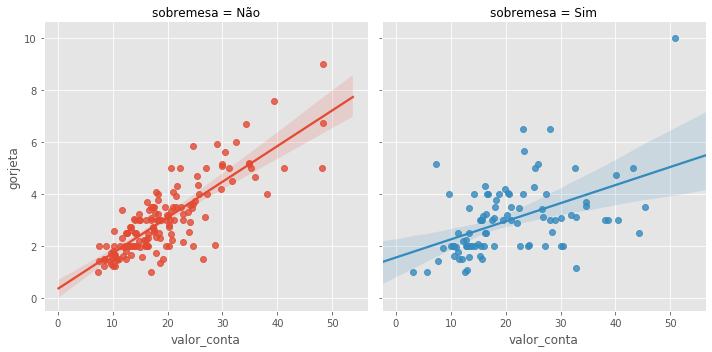

In [194]:
sns.lmplot(x='valor_conta',y='gorjeta',col='sobremesa', hue='sobremesa', data=dados)

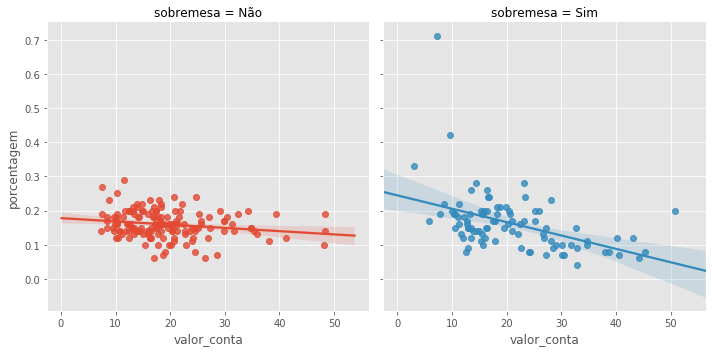

In [195]:
sns.lmplot(x='valor_conta',y='porcentagem',col='sobremesa', hue='sobremesa', data=dados)

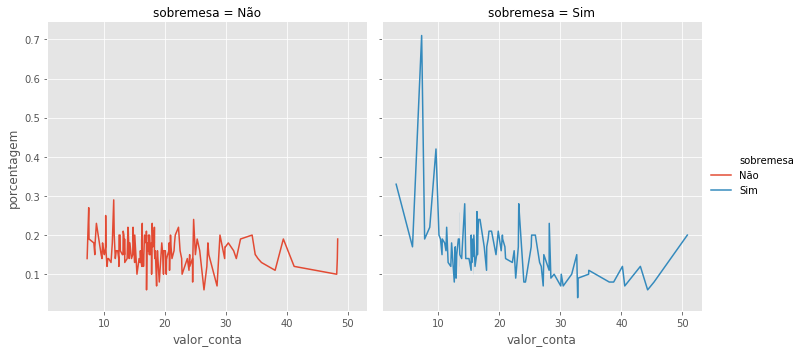

In [197]:
sns.relplot(x='valor_conta', y='porcentagem', col='sobremesa', hue='sobremesa', kind='line', data=dados)

* Insight: visualmente, existe uma diferença no valor da gorjeta daqueles pediram sobremesa e que não pediram sobremesa

## Teste de Hipótese 1

### **H<sup>null</sup>**
>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

### **H<sup>alt</sup>**
>**A distribuição da taxa da gorjeta é diferente entre os dois grupos**

In [275]:
from scipy.stats import ranksums

In [200]:
# query para isolar a porcentagem daqueles que pediram sobremesa
sobremesa = dados.query('sobremesa=="Sim"').porcentagem
sobremesa

56     0.08
58     0.16
60     0.16
61     0.14
62     0.18
       ... 
234    0.19
236    0.08
237    0.04
240    0.07
241    0.09
Name: porcentagem, Length: 93, dtype: float64

In [201]:
# query para isolar a porcentagem daqueles que NÃO pediram sobremesa
sem_sobremesa = dados.query('sobremesa=="Não"').porcentagem
sem_sobremesa

0      0.06
1      0.16
2      0.17
3      0.14
4      0.15
       ... 
235    0.12
238    0.13
239    0.20
242    0.10
243    0.16
Name: porcentagem, Length: 151, dtype: float64

In [209]:
# ranksums( ) --> Compute the Wilcoxon rank-sum statistic for two samples.
#The Wilcoxon rank-sum test tests the null hypothesis that two sets of measurements are drawn from the same distribution.  The alternative
# hypothesis is that values in one sample are more likely to be larger than the values in the other sample.
r = ranksums(sobremesa, sem_sobremesa)
r

RanksumsResult(statistic=-0.6331073145314825, pvalue=0.5266635660124415)

In [207]:
print('O valor do p-value é de {}'.format(r.pvalue))

O valor do p-value é de 0.5266635660124415


**H<sup>null</sup>**
> A distribuição da taxa da gorjeta é a mesma nos dois grupos.
A diferença entre os valores das porcentagens confrotando os dois grupos (sobremesa x sem_sobremesa) é insignificante. Não podemos dizer que a população (desta amostra) terá comportamento diferente.
Para aceitarmos a **hipótese alternativa** o **pvalue** deve ser <= 0.05

O **p-value** representa a probabilidade daquela amostra ter acontecido dentro da população. Se a chance é pequena, geralmente **p-value < 0,05**, representa que um evento muito raro aconteceu, então optamos por descartar a hipótese nula, e dizer que ela pode não ser verdade.

* Na estatística clássica, o valor-p (também chamado de nível descritivo ou probabilidade de significância), é a probabilidade de se obter uma estatística de teste igual ou mais extrema que aquela observada em uma amostra, sob a hipótese nula. Por exemplo, em testes de hipótese, pode-se rejeitar a hipótese nula a 5% caso o valor-p seja menor que 5%. Assim, uma outra interpretação para o valor-p, é que este é o menor nível de significância com que se rejeitaria a hipótese nula. Em termos gerais, um valor-p pequeno significa que a probabilidade de obter um valor da estatística de teste como o observado é muito improvável, levando assim à rejeição da hipótese nula.

# Comparando e explorando os dias da semana

## Análise 3 - Dias da semana

In [214]:
dados.head()

,valor_conta,gorjeta,sobremesa,dia,hora,pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [216]:
dados.dia.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

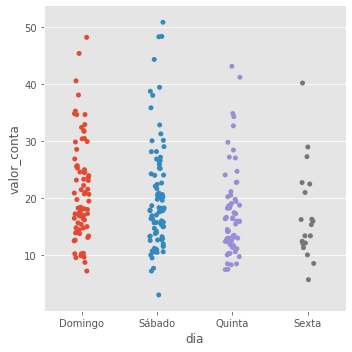

In [217]:
# Plot Categórico
sns.catplot(x='dia', y='valor_conta', data=dados)


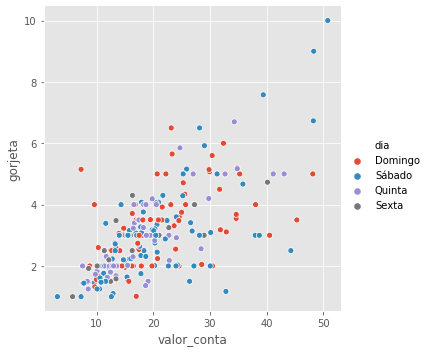

In [219]:
sns.relplot(x='valor_conta', y='gorjeta', hue='dia', data=dados)

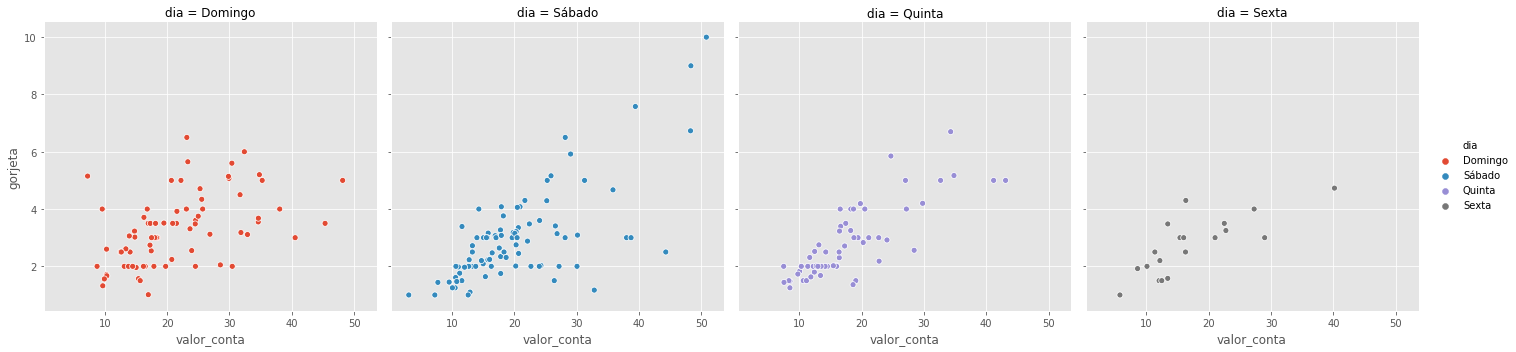

In [222]:
sns.relplot(x='valor_conta', y='gorjeta', hue='dia', col='dia', data=dados)

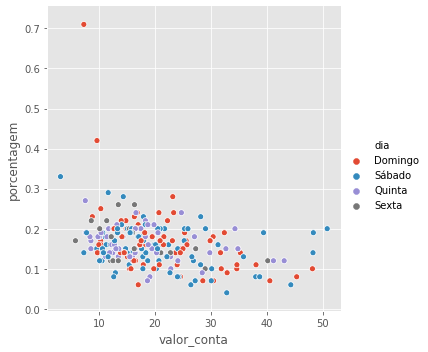

In [220]:
sns.relplot(x='valor_conta', y='porcentagem', hue='dia', data=dados)

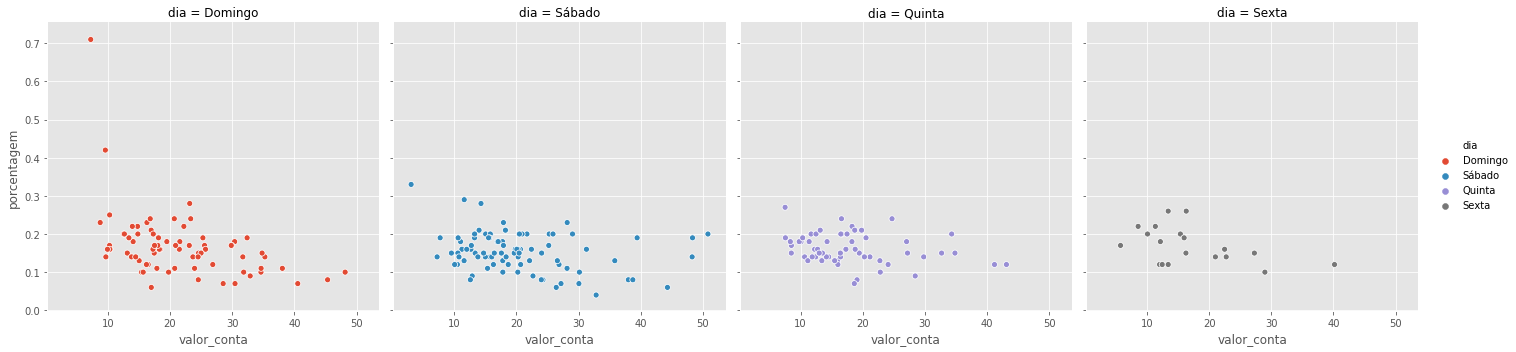

In [221]:
sns.relplot(x='valor_conta', y='porcentagem', hue='dia', col='dia', data=dados)

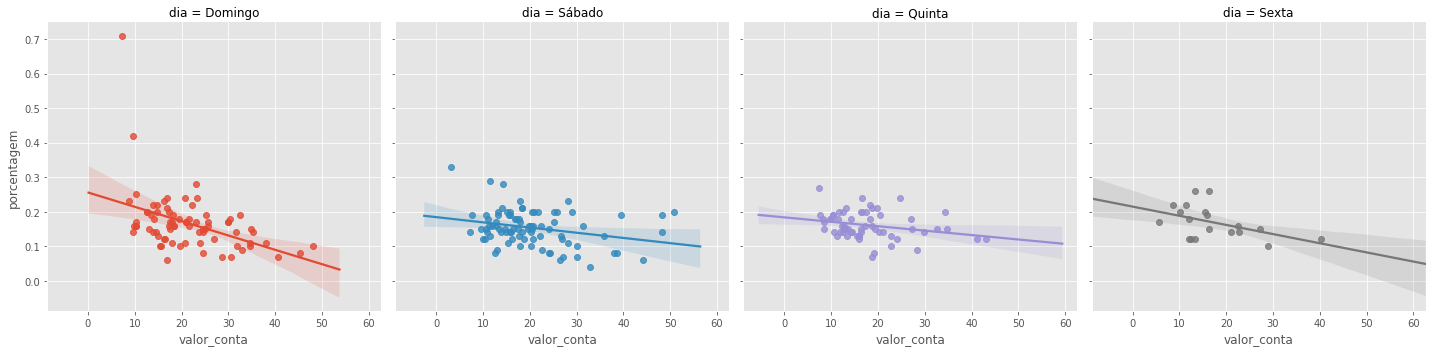

In [223]:
sns.lmplot(x='valor_conta', y='porcentagem', hue='dia', col='dia', data=dados)

## Análise descritiva

### Média geral das gorjetas

In [226]:
media_geral_gorjeta = dados.gorjeta.mean()

### Médias agrupadas por dia da semana

In [230]:
dados.groupby(['dia']).mean()

,valor_conta,gorjeta,pessoas,porcentagem
dia,,,,
Domingo,21.410000,3.255132,2.842105,0.166974
Quinta,17.682742,2.771452,2.451613,0.161129
Sexta,17.151579,2.734737,2.105263,0.169474
Sábado,20.441379,2.993103,2.517241,0.153678


In [231]:
# Alterando a exibição
dados.groupby(['dia']).mean()[['valor_conta', 'gorjeta', 'porcentagem']]

,valor_conta,gorjeta,porcentagem
dia,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [233]:
# Frequência dos dias da semana
dados.dia.value_counts()

Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia, dtype: int64

## Teste de Hipótese 2

### **H<sup>null</sup>**
>**A distribuição do valor da conta é igual no sábado e no domingo**

### **H<sup>alt</sup>**
>**A distribuição do valor da conta é diferente no sábado e no domingo**

In [243]:
valor_sabado = dados.query('dia=="Sábado"').valor_conta
valor_sabado.head()

19    20.65
20    17.92
21    20.29
22    15.77
23    39.42
Name: valor_conta, dtype: float64

In [244]:
valor_domingo = dados[dados.dia=='Domingo'].valor_conta
valor_domingo.head()

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: valor_conta, dtype: float64

In [247]:
# Análise ranksums( )
r2 = ranksums(valor_sabado,valor_domingo)
r2

RanksumsResult(statistic=-0.9198084864360142, pvalue=0.3576728477868443)

In [248]:
print('O valor do p-value é de {}'.format(r2.pvalue))

O valor do p-value é de 0.3576728477868443


**H<sup>null</sup>**
> A distribuição da taxa da gorjeta é a mesma nos dois grupos.
Mesmo no sábado tendo mais pessoas e no domingo tendo a média de gorjeta maior, não existe diferença significa entre os 'valor' dos dois dias.

# Distribuição de frequência e teste de hipótese

## Análise 4 - Hora do dia

### Displot, Booxplot e Violinplot

In [250]:
dados.head()

,valor_conta,gorjeta,sobremesa,dia,hora,pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [251]:
dados.hora.unique()

array(['Jantar', 'Almoço'], dtype=object)

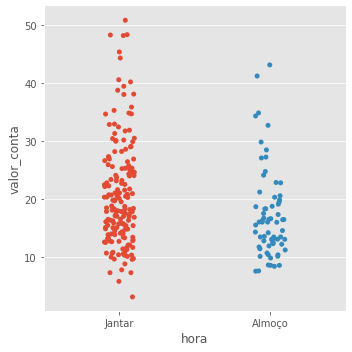

In [253]:
sns.catplot(x='hora', y='valor_conta', data=dados)

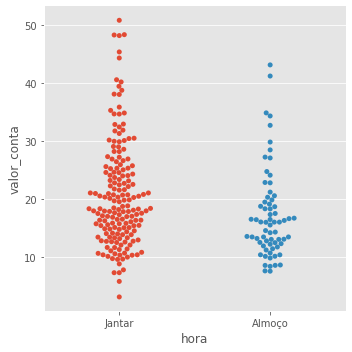

In [254]:
# Kind = 'swarm' --> melhora a visualização dos dados através do seu espalhamento
sns.catplot(x='hora', y='valor_conta', kind='swarm', data=dados)

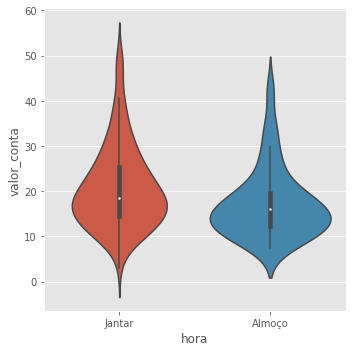

In [257]:
sns.catplot(x='hora', y='valor_conta', kind='violin', data=dados)

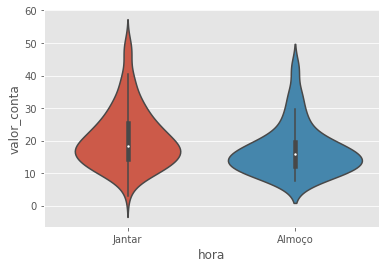

In [258]:
# Violinplot
sns.violinplot(x='hora', y='valor_conta', data=dados)

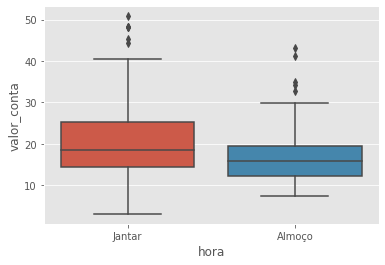

In [259]:
sns.boxplot(x='hora', y='valor_conta', data=dados)

In [263]:
almoco_valor = dados.query('hora=="Almoço"').valor_conta
almoco_valor

77     27.20
78     22.76
79     17.29
80     19.44
81     16.66
       ...  
222     8.58
223    15.98
224    13.42
225    16.27
226    10.09
Name: valor_conta, Length: 68, dtype: float64

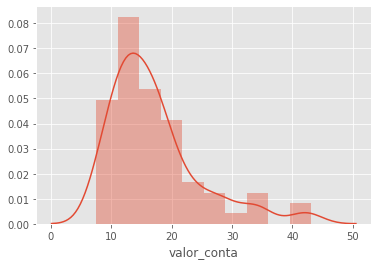

In [269]:
sns.distplot(almoco_valor)

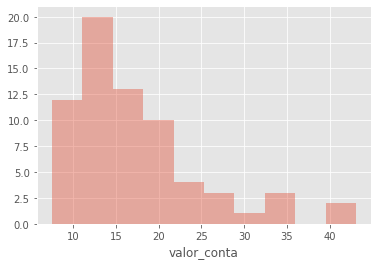

In [270]:
sns.distplot(almoco_valor, kde=False)

In [271]:
jantar_valor = dados.query('hora=="Jantar"').valor_conta
jantar_valor

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: valor_conta, Length: 176, dtype: float64

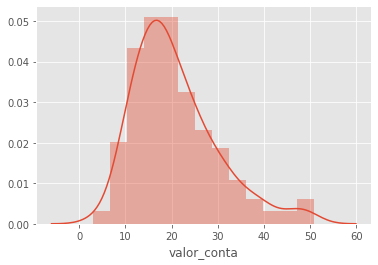

In [272]:
sns.distplot(jantar_valor)

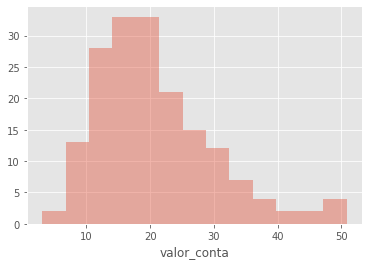

In [273]:
sns.distplot(jantar_valor, kde=False)

## Teste de Hipótese 3

In [277]:
dados.groupby(['hora']).mean()[['valor_conta','gorjeta','porcentagem']]

,valor_conta,gorjeta,porcentagem
hora,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


### **H<sup>null</sup>**
>**A distribuição do valor da conta é a mesma nos dois grupos**

### **H<sup>alt</sup>**
>**A distribuição do valor da conta é diferente nos dois grupos**

In [279]:
r3 = ranksums(almoco_valor,jantar_valor)
r3

RanksumsResult(statistic=-3.2438872807262955, pvalue=0.0011791039723641672)

In [280]:
print('O valor do p-value é de {}'.format(r3.pvalue))

O valor do p-value é de 0.0011791039723641672


Conclusão : **H<sup>alt</sup>**
> A distribuição do valor da conta é diferente nos dois grupos.

## Teste de Hipótese 4

### **H<sup>null</sup>**
>**A distribuição da porcentagem é a mesma nos dois grupos (Almoço/Jantar)**

### **H<sup>alt</sup>**
>**A distribuição da porcentagem é diferente nos dois grupos (Almoço/Jantar)**

In [285]:
almoco_porcentagem = dados.query('hora=="Almoço"').porcentagem
almoco_porcentagem.head()

77    0.15
78    0.13
79    0.16
80    0.15
81    0.20
Name: porcentagem, dtype: float64

In [286]:
jantar_porcentagem = dados.query('hora=="Jantar"').porcentagem
jantar_porcentagem.head()

0    0.06
1    0.16
2    0.17
3    0.14
4    0.15
Name: porcentagem, dtype: float64

In [289]:
r4 = ranksums(almoco_porcentagem,jantar_porcentagem)
r4

RanksumsResult(statistic=1.1258018532735787, pvalue=0.2602493995587126)

In [290]:
print('O valor do p-value é de {}'.format(r4.pvalue))

O valor do p-value é de 0.2602493995587126


Conclusão : **H<sup>alt</sup>**
>**A distribuição da porcentagem é a mesma nos dois grupos (Almoço/Jantar)**